In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 

In [28]:
import lightgbm as lgb

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [3]:
sc=StandardScaler()

In [35]:
##Rading of Train and Test files
df_train = pd.read_csv('TRAIN.csv')    
df_test = pd.read_csv('TEST_FINAL.csv')

In [5]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [6]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [7]:
df_train.shape

(188340, 10)

In [8]:
df_test.shape

(22265, 8)

In [9]:
df_train.isnull().sum() ## No presence of null values in train set

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [11]:
df_test.isnull().sum()  ##No presence of null value in test set

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [12]:
df_train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [13]:
df_test.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

## Feature Selection

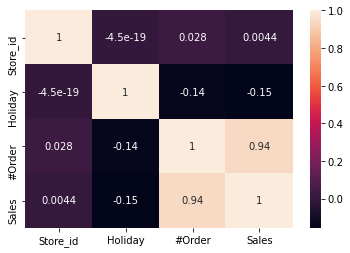

In [15]:
sns.heatmap(df_train.corr(),annot=True)

Huge Correlation between Order and Sales.
Hence Order can be dropped otherwise it would result in high multicollinearity

In [36]:
df_train=df_train.drop('#Order',axis=1)
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,45614.52


 ID, Storeid and Date columns are also not important from modelling point of view, since majority of the features in 
 train dataset are categorical variables which can be dummy encoded.

In [37]:
df_train=df_train.drop(['ID','Store_id','Date'],axis=1)
df_train.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,S1,L3,R1,1,Yes,7011.84
1,S4,L2,R1,1,Yes,51789.12
2,S3,L2,R1,1,Yes,36868.20
3,S2,L3,R1,1,Yes,19715.16
4,S2,L3,R4,1,Yes,45614.52


In [39]:
seperate_ids = df_test['ID'] # Seperating the id's of test dataset to another variable,

Similarly in test set also the ID, Store_id and Date columns are removed.

In [40]:
df_test=df_test.drop(['ID','Store_id','Date'],axis=1)
df_test.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,S4,L2,R3,0,No
1,S1,L1,R1,0,No
2,S4,L2,R1,0,No
3,S1,L1,R4,0,No
4,S1,L1,R2,0,No


## Dummy Encoding

In [41]:
df_train=pd.get_dummies(df_train,drop_first = True)
df_train.head()

,Holiday,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_Yes
0,1,7011.84,0,0,0,0,1,0,0,0,0,0,1
1,1,51789.12,0,0,1,1,0,0,0,0,0,0,1
2,1,36868.20,0,1,0,1,0,0,0,0,0,0,1
3,1,19715.16,1,0,0,0,1,0,0,0,0,0,1
4,1,45614.52,1,0,0,0,1,0,0,0,0,1,1


In [42]:
df_test=pd.get_dummies(df_test,drop_first = True)
df_test.head()

,Holiday,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_Yes
0,0,0,0,1,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
df_train.shape

(188340, 13)

In [44]:
df_test.shape

(22265, 12)

In [ ]:
## Splitting the train set to train and test sets.

In [45]:
x=df_train.drop(['Sales'],axis = 1)
y=df_train['Sales']

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
print("xtrain: ",xtrain.shape)
print("ytrain: ",ytrain.shape)
print("xtest: ",xtest.shape)
print("ytest: ",ytest.shape)

xtrain:  (150672, 12)
ytrain:  (150672,)
xtest:  (37668, 12)
ytest:  (37668,)


## Model Building

### Base Model

In [54]:
xc=sm.add_constant(xtrain)
basicmodel=sm.OLS(ytrain,xc).fit()
basicmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                 1.531e+04
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:37:29   Log-Likelihood:            -1.6339e+06
No. Observations:              150672   AIC:                         3.268e+06
Df Residuals:                  150659   BIC:                         3.268e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.512e+04     87.712    400.389      0.000    3.49e+04    3.53e+04
Holiday          -8838.0844     94.340    -93.684      0.000   -9022.988   -8653.181
Store_Type_S2    -4735.3359    111.699    -42.394      0.000   -4954.263   -4516.409
Store_Type_S3     4637.7732    106.936     43.369      0.000    4428.180    4847.366
Store_Type_S4     1.357e+04    108.941    124.602      0.000    1.34e+04    1.38e+04
Location_Type_L2  1.053e+04     95.302    110.474      0.000    1.03e+04    1.07e+04
Location_Type_L3 -4589.2883    100.391    -45.714      0.000   -4786.052   -4392.525
Location_Type_L4 -7647.2294    150.197    -50.915      0.000   -7941.613   -7352.846
Location_Type_L5 -1.023e+04    152.315    -67.134      0.000   -1.05e+04   -9926.981
Region_Code_R2    -621.6879     86.237     -7.209      0.000    -790.710    -452.666
Region_Code_R3    -923.5167     91.065    -10.141      0.000   -1102.002    -745.031
Region_Code_R4   -1203.4958    110.482    -10.893      0.000   -1420.039    -986.953
Discount_Yes      1.212e+04     64.264    188.546      0.000     1.2e+04    1.22e+04
==============================================================================
Omnibus:                    47743.971   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           366444.567
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                      10.172   Cond. No.                         8.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## The base model itself is giving low 

In [55]:
ypredtrain=basicmodel.predict(xc)
msetrain=mean_squared_error(ytrain,ypredtrain)
rmsetrain=np.sqrt(msetrain)
print(msetrain,rmsetrain)

153749424.6078216 12399.57356556352


In [56]:
xctest=sm.add_constant(xtest)
ypredtest=basicmodel.predict(xctest)
msetest=mean_squared_error(ytest,ypredtest)
rmsetest=np.sqrt(msetest)
print(msetest,rmsetest)

153215946.99166605 12378.042938674354


 Basic model is giving signs of overfitting with respect to the rmse values of train and test sets.
 To improve the performance random models were tried such as:
 Linearregression, SGDRegressor, DecisionTreeregressor, RandomForestRegressor, GradientBoostingRegressor,
 XGBoostRegressor, LightGBMRegressor etc.
 Among all these trials, LightGBM resulted in optimum results.
 Hence LghtGBM is selected as the best model.
 Hereby presenting with codes of only the best model i.e. Light GBM Regressor.

## LightGBM Regressor Predictions

In [48]:
xtrains=sc.fit_transform(xtrain) 
xtests=sc.transform(xtest)

## Scaling the train and test sets since a boosting model is used for better predictions
## and also to prevent data leakage. 

In [49]:
lgbmr=lgb.LGBMRegressor(random_state=10)
lgbmodel=lgbmr.fit(xtrains,ytrain)

In [57]:
lgbmodel.score(xtrains,ytrain) ## R2 score value.

0.5699262551670701

In [50]:
ypredtrain=lgbmodel.predict(xtrains)
msetrain=mean_squared_error(ytrain,ypredtrain)
rmsetrain=np.sqrt(msetrain)
print(msetrain,rmsetrain)

146780389.89840937 12115.295699998798


In [51]:
ypredtest=lgbmodel.predict(xtests)
msetest=mean_squared_error(ytest,ypredtest)
rmsetest=np.sqrt(msetest)
print(msetest,rmsetest)

146229955.81962743 12092.557869186629


## Hyperparameter Tuning

In [60]:
params={'n_estimators':sp_randint(25,70),'max_depth':sp_randint(2,25),'learning_rate':sp_uniform(0,0.1),'num_leaves':sp_randint(2,30)}
ls1=RandomizedSearchCV(estimator=lgbmr,param_distributions=params,cv=3,scoring='r2',n_iter=25,n_jobs=-1,random_state=10)
ls1.fit(xtrains,ytrain)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=10), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0DB874EB0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0D142E8E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0CEF91820>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0DB862C70>},
                   random_state=10, scoring='r2')

In [61]:
lgbmr1=lgb.LGBMRegressor(**ls1.best_params_,random_state=10,importance_type='split')
lgbmmodel1=lgbmr1.fit(xtrains,ytrain)


In [62]:
ypredtrain=lgbmmodel1.predict(xtrains)
msetrain=mean_squared_error(ytrain,ypredtrain)
rmsetrain=np.sqrt(msetrain)
print(msetrain,rmsetrain)

147831197.23630294 12158.58533038704


In [63]:
ypredtest=lgbmmodel1.predict(xtests)
msetest=mean_squared_error(ytest,ypredtest)
rmsetest=np.sqrt(msetest)
print(msetest,rmsetest)

147059507.69055325 12126.809460470353


 R2 score also there is no big improvement and also the overfitting prevails with respect to the rmse value.
 Hyperparameter tuning is also done to improve the performance. But on checking, the normal LGBM model
 gives better performance.

In [68]:
final_predictions = lgbmodel.predict(df_test)
submission=pd.DataFrame([seperate_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Sales"},inplace=True)
submission

,ID,Sales
0,T1188341,53372.5
1,T1188342,34589.8
2,T1188343,61634.7
3,T1188344,35991.5
4,T1188345,35843.7
...,...,...
22260,T1210601,22346.7
22261,T1210602,61634.7
22262,T1210603,48056.4
22263,T1210604,35991.5


In [69]:
submission.to_csv('Final Model new - lgbmodel predictions.csv',index = False)